# 3. Regress feature axis

For more information about axis source code, see src/axis.py.

In [1]:
import h5py
import pickle
import matplotlib.pyplot as plt
import keras

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

Using TensorFlow backend.


### Optional: Download predicted labels 

In [3]:
! cd ../02_classifiers/inceptionv3/predictions/ && wget -nc data.belanec.eu/inceptionv3/predictions/predictions_inceptionv3_5attr.pkl

File ‘predictions_inceptionv3_5attr.pkl’ already there; not retrieving.



In [4]:
! cd ../02_classifiers/xception/predictions/ && wget -nc data.belanec.eu/xception/predictions/predictions_xception_5attr.pkl

File ‘predictions_xception_5attr.pkl’ already there; not retrieving.



Specify attributes for serialization purposes and specify path to predicted labels.

In [2]:
_attributes = ['Eyeglasses', 'Smiling', 'Male', 'No_Beard', 'Young']
_predictions_path = '../02_classifiers/inceptionv3/predictions/predictions_inceptionv3_5attr.pkl'
_feature_direction_path 'feature_directions/feature_direction_inceptionv3_5attr_tanh_normalized.pkl'

In [3]:
# load labels
with open(_predictions_path, 'rb') as f:
    predictions = pickle.load(f)

In [4]:
# load random noise vectors
with h5py.File('sample_z2.h5', 'r') as f:
    z = f['z'][:]

Data check and a preview.

In [5]:
from custom_gen import StyleGANGenerator
_stylegan_ffhq_f_gdrive_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl'

gen = StyleGANGenerator(_stylegan_ffhq_f_gdrive_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


/home/rbelanec/anaconda3/envs/BP/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


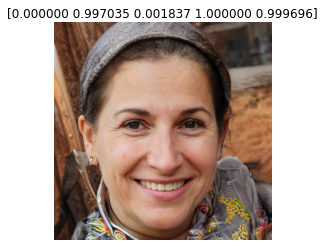

In [6]:
np.set_printoptions(formatter={'float_kind':"{:.6f}".format})

image_n = 154841
img = gen.get_images(np.reshape(z[image_n], (1,512)))
plt.title(predictions[image_n])
plt.axis('off')
plt.imshow(img[0]/255)

In [8]:
import src.axis as axis
# default method is linear
# swap linear/tanh for experimentation
feature_slope = axis.find_feature_axis(z, predictions, method='tanh')

In [9]:
# vector normalization, True/False for exprimentation
_normalize_feature_direction = True
if _normalize_feature_direction:
    feature_direction = axis.normalize_feature_axis(feature_slope)
else:
    feature_direction = feature_slope

Save the feature directions.

In [11]:
dict_to_save = {'direction': feature_direction, 'name': _attributes}
with open(_feature_direction_path, 'wb') as f:
    pickle.dump(dict_to_save, f)